Code to make nice lightcurves specifically for the NuSTAR-MaGIXS-2 co-observation. Processes the NuSTAR data, downloads the GOES, uses prepped AIA data from the NCCS (see paths pointing to that below). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from astropy.io import fits
from astropy import units as u
import importlib
import pathlib
import datetime
import astropy.time

#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import lightcurves as lc

You can just run this whole thing to re-make them if you want. 

In [3]:
def lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, plotname, 
                       all_fov_nustar=False,
                       rangegA=[1e-8,2e-7], rangegB=[1e-6,4e-6], rangenustar_s=[0.2,1.], rangenustar=[0.,1.],
                              rangeaia=[0.95,1.], getgoes=True, plotnustar_stats=True,
                              plotnustar_nonnorm=True, plotGOESB=True, neupert=False):

    """
    Makes a bunch of lightcurves for a given orbit or sub interval. Hard-coded to a specific kind of plot
    I was making – lc.plot_multi_lightcurves has more options than this. 
    """
    importlib.reload(lc)
    if getgoes:
        #Get GOES
        lc.get_goes(timerange, satellite=16)

    evtA = glob.glob(obspath+'/event_cl/*A06_cl_sunpos.evt')
    evtB = glob.glob(obspath+'/event_cl/*B06_cl_sunpos.evt')
    hkA  = glob.glob(obspath+'/hk/*A_fpm.hk')
    hkB  = glob.glob(obspath+'/hk/*B_fpm.hk')
    
    importlib.reload(lc)
    lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[2.,4.], livetime_corr=True, event_stats=True)
    lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[4.,6.],  livetime_corr=True, event_stats=True)
    lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[6.,10.],  livetime_corr=True, event_stats=True)
    lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[10.,15.],  livetime_corr=True, event_stats=True)

    path_to_dodem = '/Users/jmdunca2/do-dem/'

    if all_fov_nustar:
        nustar_file_list=[]
    else:
        
        macro_intervals= [[astropy.time.Time('2024-07-16T11:04:00', scale='utc', format='isot'),
                            astropy.time.Time('2024-07-16T11:30:00', scale='utc', format='isot')],
                         [astropy.time.Time('2024-07-16T19:03:30', scale='utc', format='isot'),
                            astropy.time.Time('2024-07-16T20:03:30', scale='utc', format='isot')],
                         [astropy.time.Time('2024-07-17T04:40:00', scale='utc', format='isot'),
                            astropy.time.Time('2024-07-17T05:40:00', scale='utc', format='isot')]]                   
        
        macro_interval = macro_intervals[int_ind]
        
        mins = 0.5
        
        time_intervals=[]
        checktime = macro_interval[0]
        while checktime < macro_interval[1]:
            time_intervals.append([checktime, checktime+mins*u.min])
            checktime = checktime+mins*u.min  
        count=0    
        
        res_files=[]
        for t in time_intervals:
            time = t
            timestring = time[0].strftime('%H-%M-%S')
            stopstring = time[1].strftime('%H-%M-%S')
            timestring=timestring+'_'+stopstring
        
            file = glob.glob(working_dir+'/'+timestring+'/'+timestring+'*.pickle')[0]
            res_files.append(file)

        nustar_file_list=res_files

    

    lc.plot_multi_lightcurves(plotaia=True, markxrt=False, plotnustar=True, plotGOESB=plotGOESB, plotGOESA=False,
                              plotnustar_stats=plotnustar_stats,
                              plotnustar_nonnorm=plotnustar_nonnorm,
                              nccs_aia=True, nccs_aia_dir=nccs_aia_dir,
                              nustar_file_list=nustar_file_list,
                              rangegA=rangegA, rangegB=rangegB, rangenustar_s=rangenustar_s, rangenustar=rangenustar,
                              rangeaia=rangeaia, 
                              eranges = [[2.,4.],[4.,6.],[6.,10.], [10.,15.]],
                              timerange=timerange,
                              plotname=plotname, neupert=neupert)


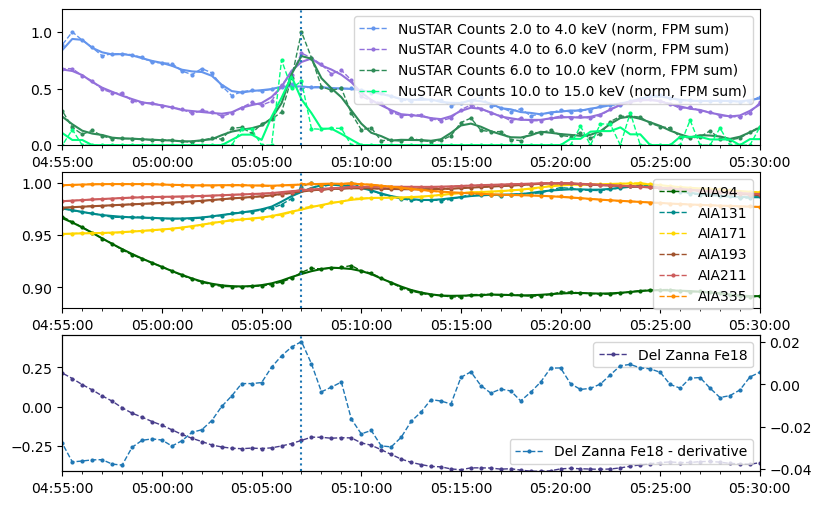

In [16]:
#Orbit 7, Disk AR
working_dir=path_to_dodem+'/jul-24-AR13743/'
int_ind=2
timerange=[datetime.datetime(2024, 7, 17, 4, 55), datetime.datetime(2024, 7, 17, 5, 30)]
obspath='/Users/jmdunca2/nustar/jul-2024/21012007001/'
nccs_aia_dir='/Users/jmdunca2/do-dem/nccs_aia_21012007001_1/'
lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, 'orbit_7_disk_flarelet_', getgoes=False,
                        plotnustar_stats=False,
                        plotnustar_nonnorm=False, plotGOESB=False, rangeaia=[0.88,1.01], rangenustar=[0,1.2],
                           neupert=True)


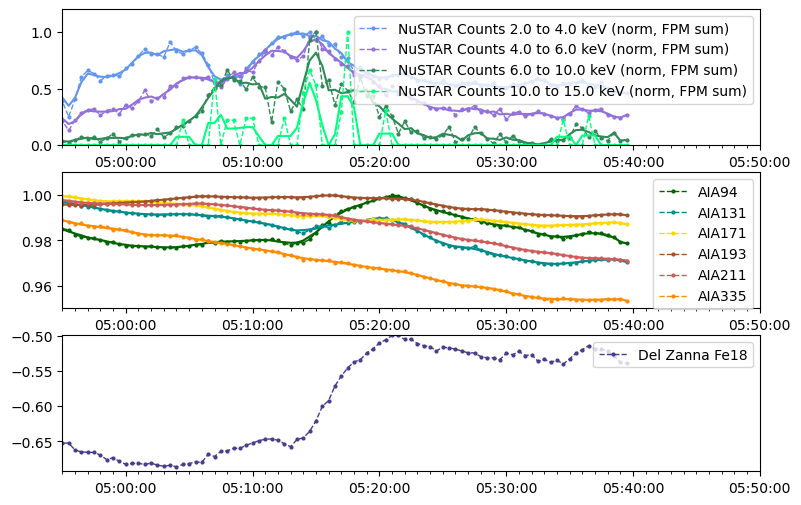

In [49]:
#Orbit 7, Disk AR
working_dir=path_to_dodem+'/jul-24-AR13738/'
nint_ind=2
timerange=[datetime.datetime(2024, 7, 17, 4, 55), datetime.datetime(2024, 7, 17, 5, 50)]
obspath='/Users/jmdunca2/nustar/jul-2024/21012007001/'
nccs_aia_dir='/Users/jmdunca2/do-dem/nccs_aia_21012007001_0/'
lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, 'orbit_7_limb_flarelet_', getgoes=False,
                        plotnustar_stats=False,
                        plotnustar_nonnorm=False, plotGOESB=False, rangeaia=[0.95,1.01], rangenustar=[0,1.2])


Using 1s GOES flux ("flx1s")


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

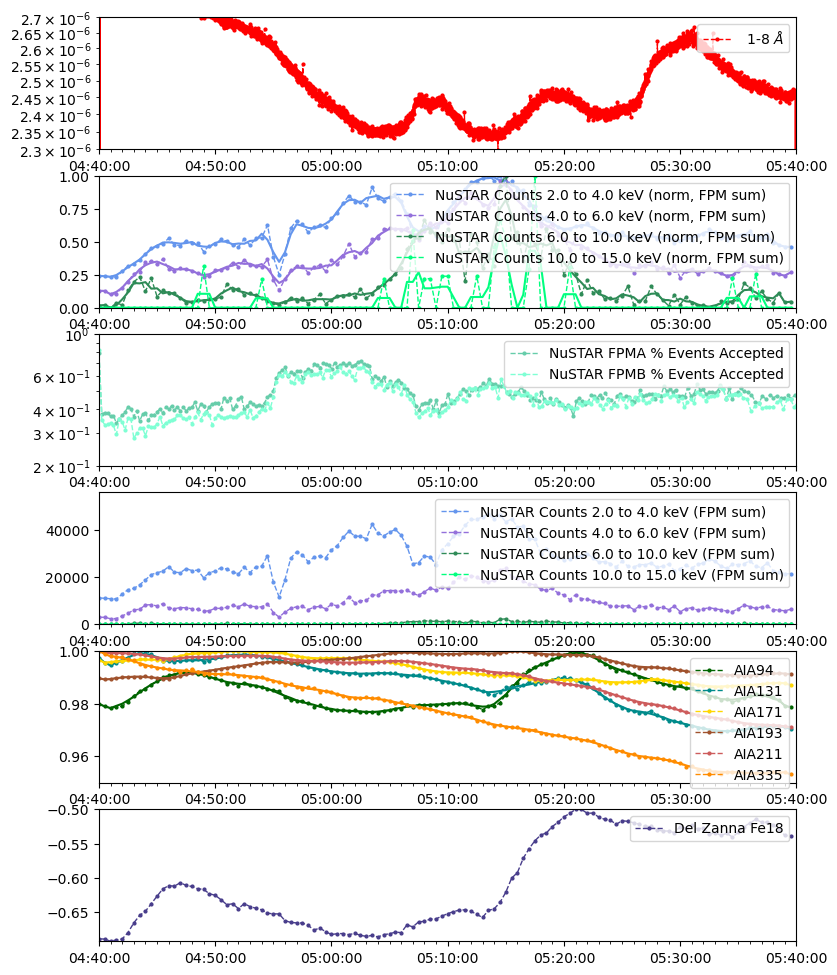

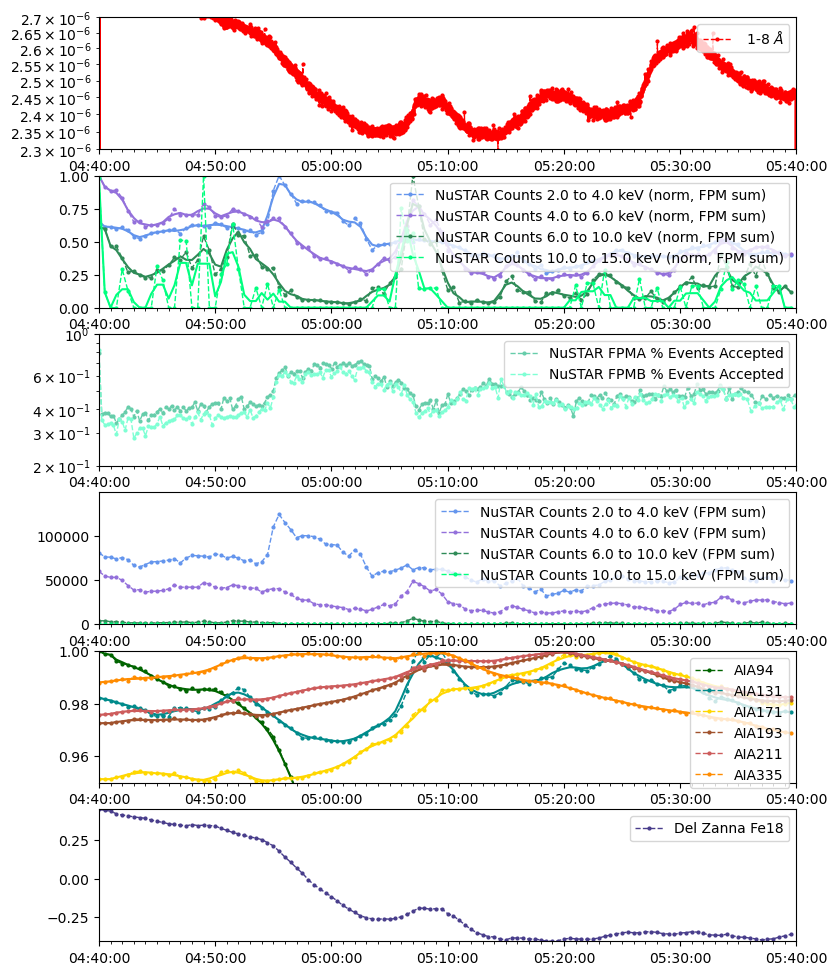

In [58]:
#Orbit 7, limb AR
working_dir=path_to_dodem+'/jul-24-AR13738/'
int_ind=2
timerange=[datetime.datetime(2024, 7, 17, 4, 40), datetime.datetime(2024, 7, 17, 5, 40)]
obspath='/Users/jmdunca2/nustar/jul-2024/21012007001/'
nccs_aia_dir='/Users/jmdunca2/do-dem/nccs_aia_21012007001_0/'
lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, 'orbit_7_limb_AR_',  rangegB=[2.3e-6,2.7e-6])

#Orbit 7, Disk AR
working_dir=path_to_dodem+'/jul-24-AR13743/'
int_ind=2
timerange=[datetime.datetime(2024, 7, 17, 4, 40), datetime.datetime(2024, 7, 17, 5, 40)]
obspath='/Users/jmdunca2/nustar/jul-2024/21012007001/'
nccs_aia_dir='/Users/jmdunca2/do-dem/nccs_aia_21012007001_1/'
lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, 'orbit_7_disk_AR_', getgoes=False, rangegB=[2.3e-6,2.7e-6])


In [59]:
2.4e-6-2.3e-6

9.999999999999989e-08

Using 1s GOES flux ("flx1s")


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

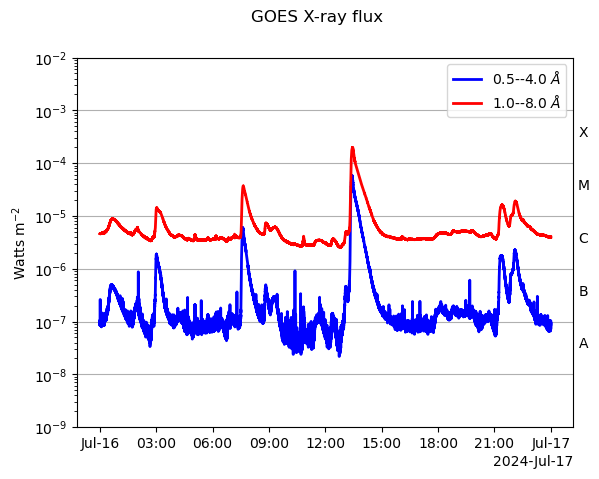

/Users/jmdunca2/do-dem//dodem/lightcurves.py:975: RuntimeWarning: invalid value encountered in divide
  countrate=counts/lvt[:-1]
/Users/jmdunca2/do-dem//dodem/lightcurves.py:696: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedA, acc_A/(acc_A+rej_A),
/Users/jmdunca2/do-dem//dodem/lightcurves.py:699: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedB, acc_B/(acc_B+rej_B),


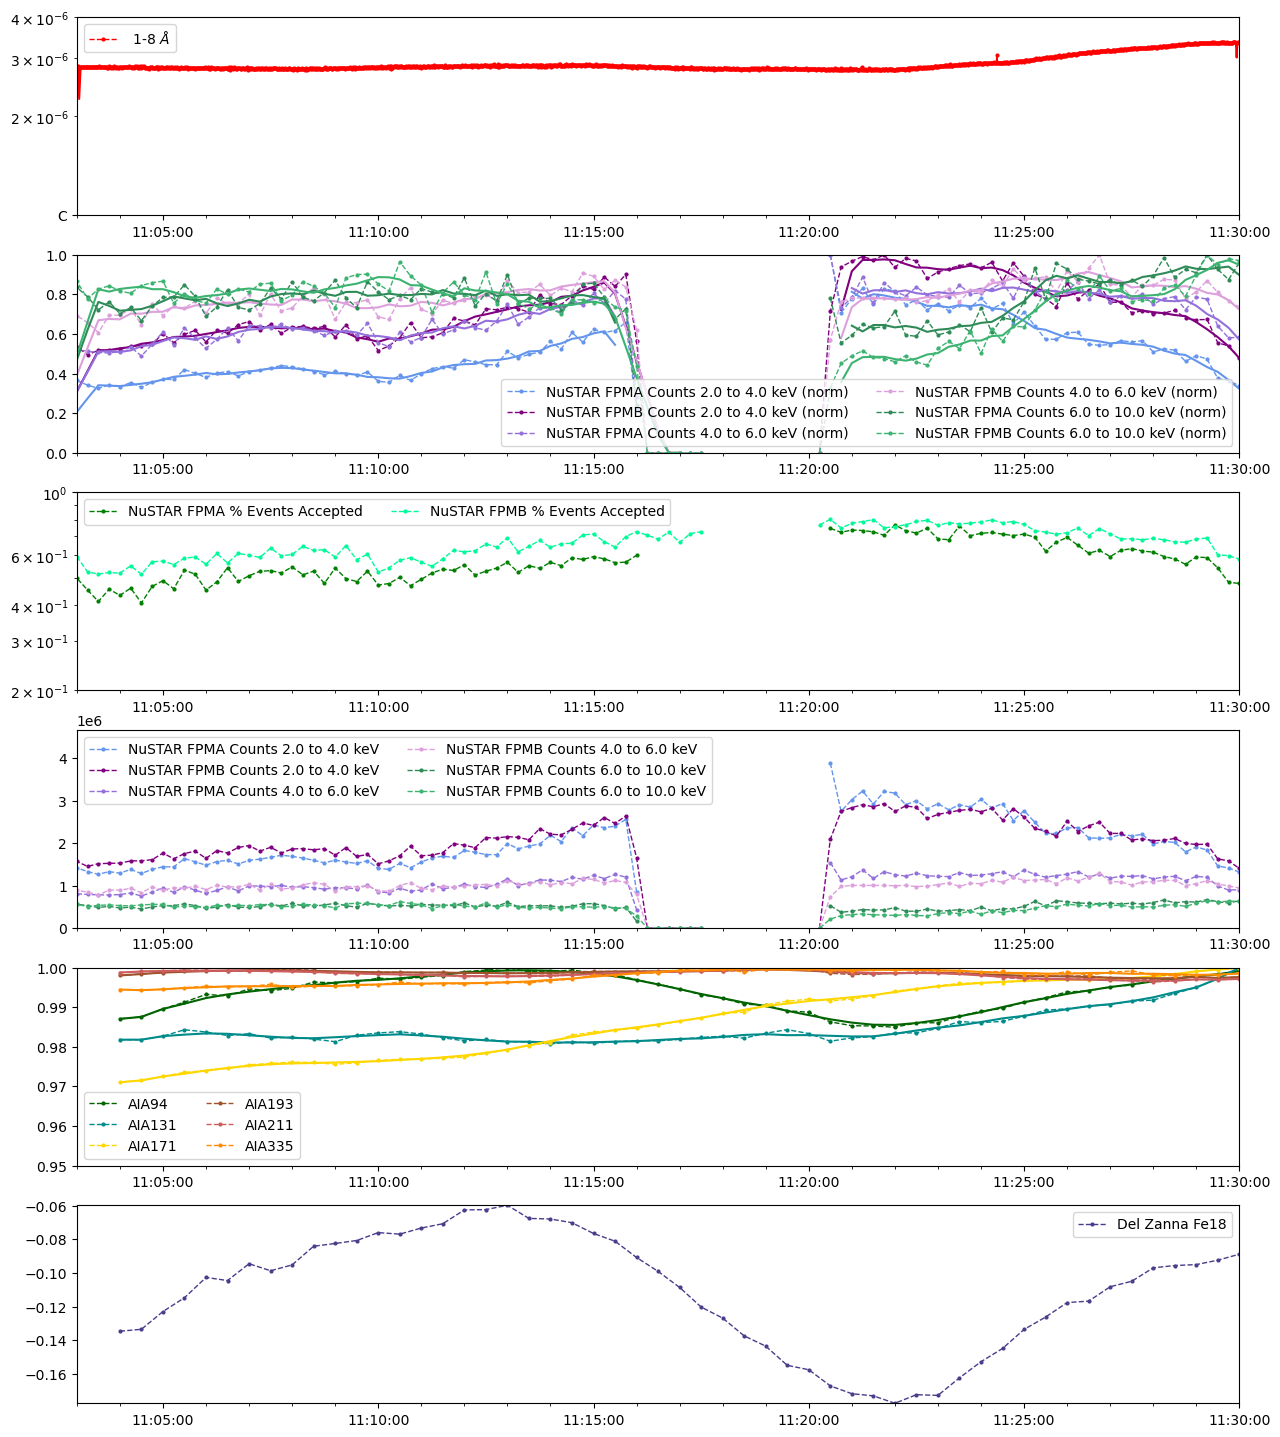

In [4]:
#Orbit 1 - only limb AR observed
working_dir=path_to_dodem+'/jul-24-AR13738/'
int_ind=0
timerange=[datetime.datetime(2024, 7, 16, 11, 3), datetime.datetime(2024, 7, 16, 11, 30)]
obspath='/Users/jmdunca2/nustar/jul-2024/21012001001/'
nccs_aia_dir='/Users/jmdunca2/do-dem/nccs_aia_21012001001/'
lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, 'orbit_1_limb_AR_', all_fov_nustar=True)

Using 1s GOES flux ("flx1s")


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

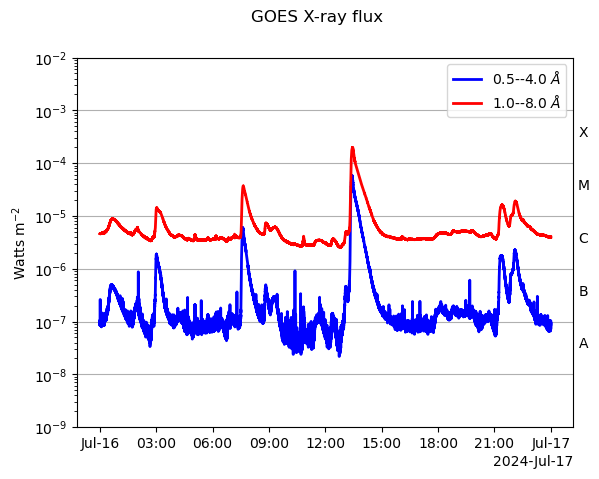

/Users/jmdunca2/do-dem//dodem/lightcurves.py:975: RuntimeWarning: invalid value encountered in divide
  countrate=counts/lvt[:-1]
/Users/jmdunca2/do-dem//dodem/lightcurves.py:696: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedA, acc_A/(acc_A+rej_A),
/Users/jmdunca2/do-dem//dodem/lightcurves.py:699: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedB, acc_B/(acc_B+rej_B),
/Users/jmdunca2/do-dem//dodem/lightcurves.py:975: RuntimeWarning: invalid value encountered in divide
  countrate=counts/lvt[:-1]
/Users/jmdunca2/do-dem//dodem/lightcurves.py:696: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedA, acc_A/(acc_A+rej_A),
/Users/jmdunca2/do-dem//dodem/lightcurves.py:699: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedB, acc_B/(acc_B+rej_B),


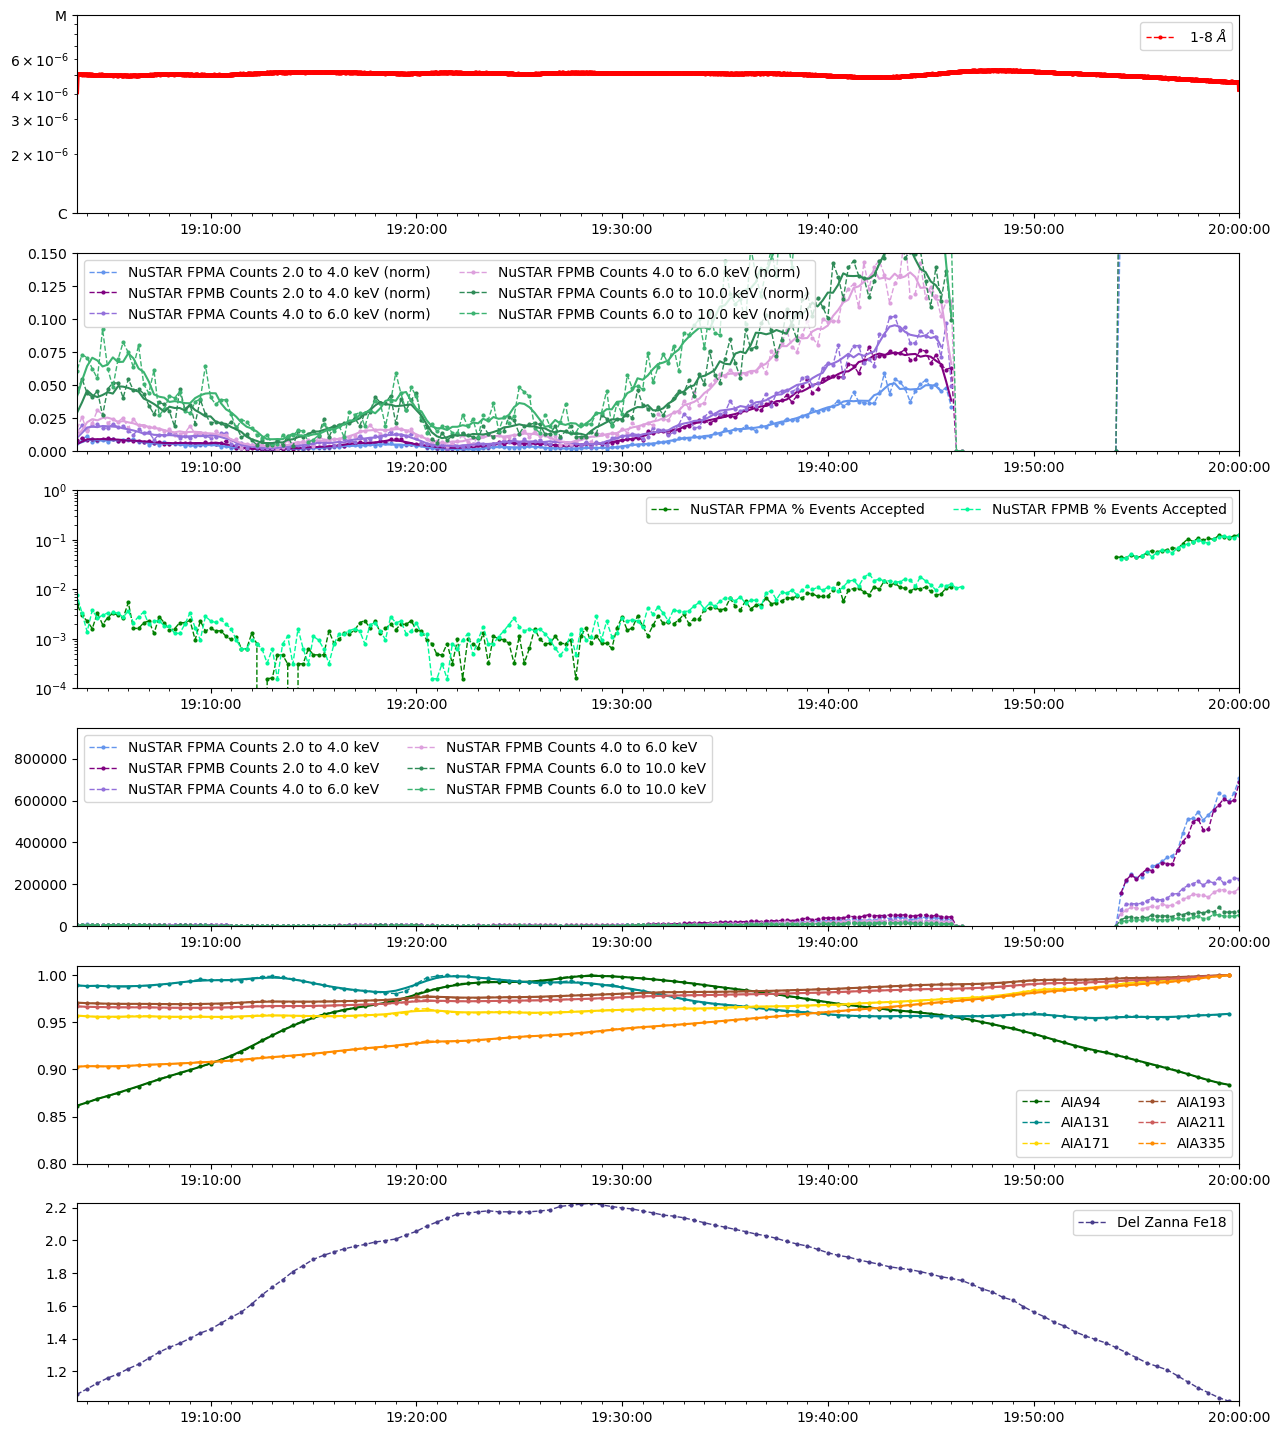

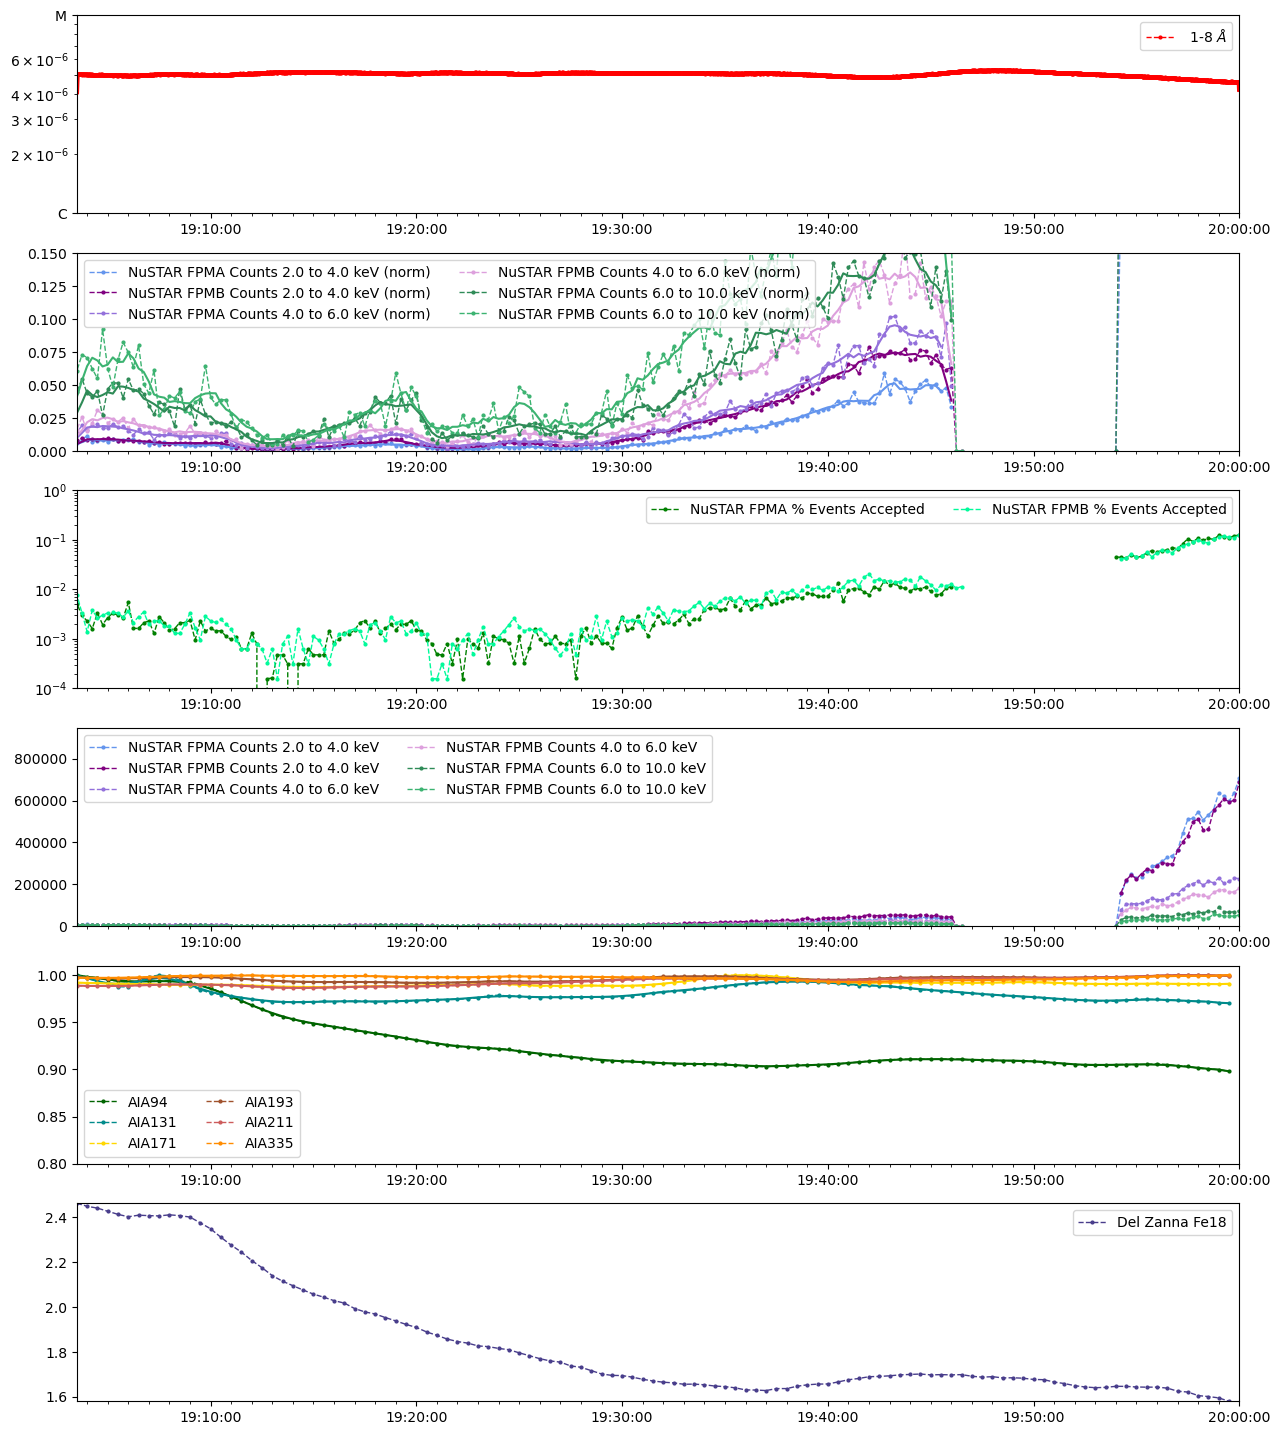

In [14]:
#Magixs orbit – disk AR

working_dir=path_to_dodem+'/jul-24-AR13743/'
int_ind=1
timerange = [datetime.datetime(2024,7,16,19, 3,30), datetime.datetime(2024,7,16,20,0)]
obspath='/Users/jmdunca2/nustar/jul-2024/21012006001/'
nccs_aia_dir='/Users/jmdunca2/do-dem/nccs_aia_21012006001_1/'
lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, 'magixs2_int_disk_AR_', all_fov_nustar=True,
                   rangegB=[1e-6,1e-5], rangeaia=[0.8,1.01], rangenustar_s=[0.0001,1.], rangenustar=[0.,0.15])

#Limb AR
working_dir=path_to_dodem+'/jul-24-AR13738/'
int_ind=1
nccs_aia_dir='/Users/jmdunca2/do-dem/nccs_aia_21012006001_0/'
lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, 'magixs2_int_limb_AR_', all_fov_nustar=True,
                   rangegB=[1e-6,1e-5], rangeaia=[0.8,1.01], rangenustar_s=[0.0001,1.], rangenustar=[0.,0.15], getgoes=False)

Using 1s GOES flux ("flx1s")


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

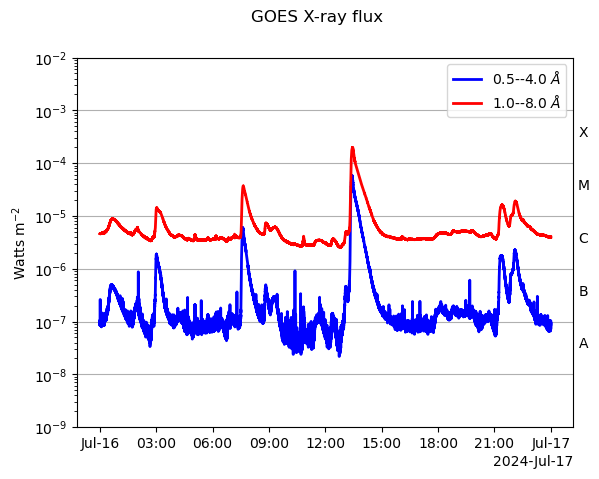

/Users/jmdunca2/do-dem//dodem/lightcurves.py:975: RuntimeWarning: invalid value encountered in divide
  countrate=counts/lvt[:-1]
/Users/jmdunca2/do-dem//dodem/lightcurves.py:696: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedA, acc_A/(acc_A+rej_A),
/Users/jmdunca2/do-dem//dodem/lightcurves.py:699: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedB, acc_B/(acc_B+rej_B),
/Users/jmdunca2/do-dem//dodem/lightcurves.py:975: RuntimeWarning: invalid value encountered in divide
  countrate=counts/lvt[:-1]
/Users/jmdunca2/do-dem//dodem/lightcurves.py:696: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedA, acc_A/(acc_A+rej_A),
/Users/jmdunca2/do-dem//dodem/lightcurves.py:699: RuntimeWarning: invalid value encountered in divide
  nuax_s.plot(times_convertedB, acc_B/(acc_B+rej_B),


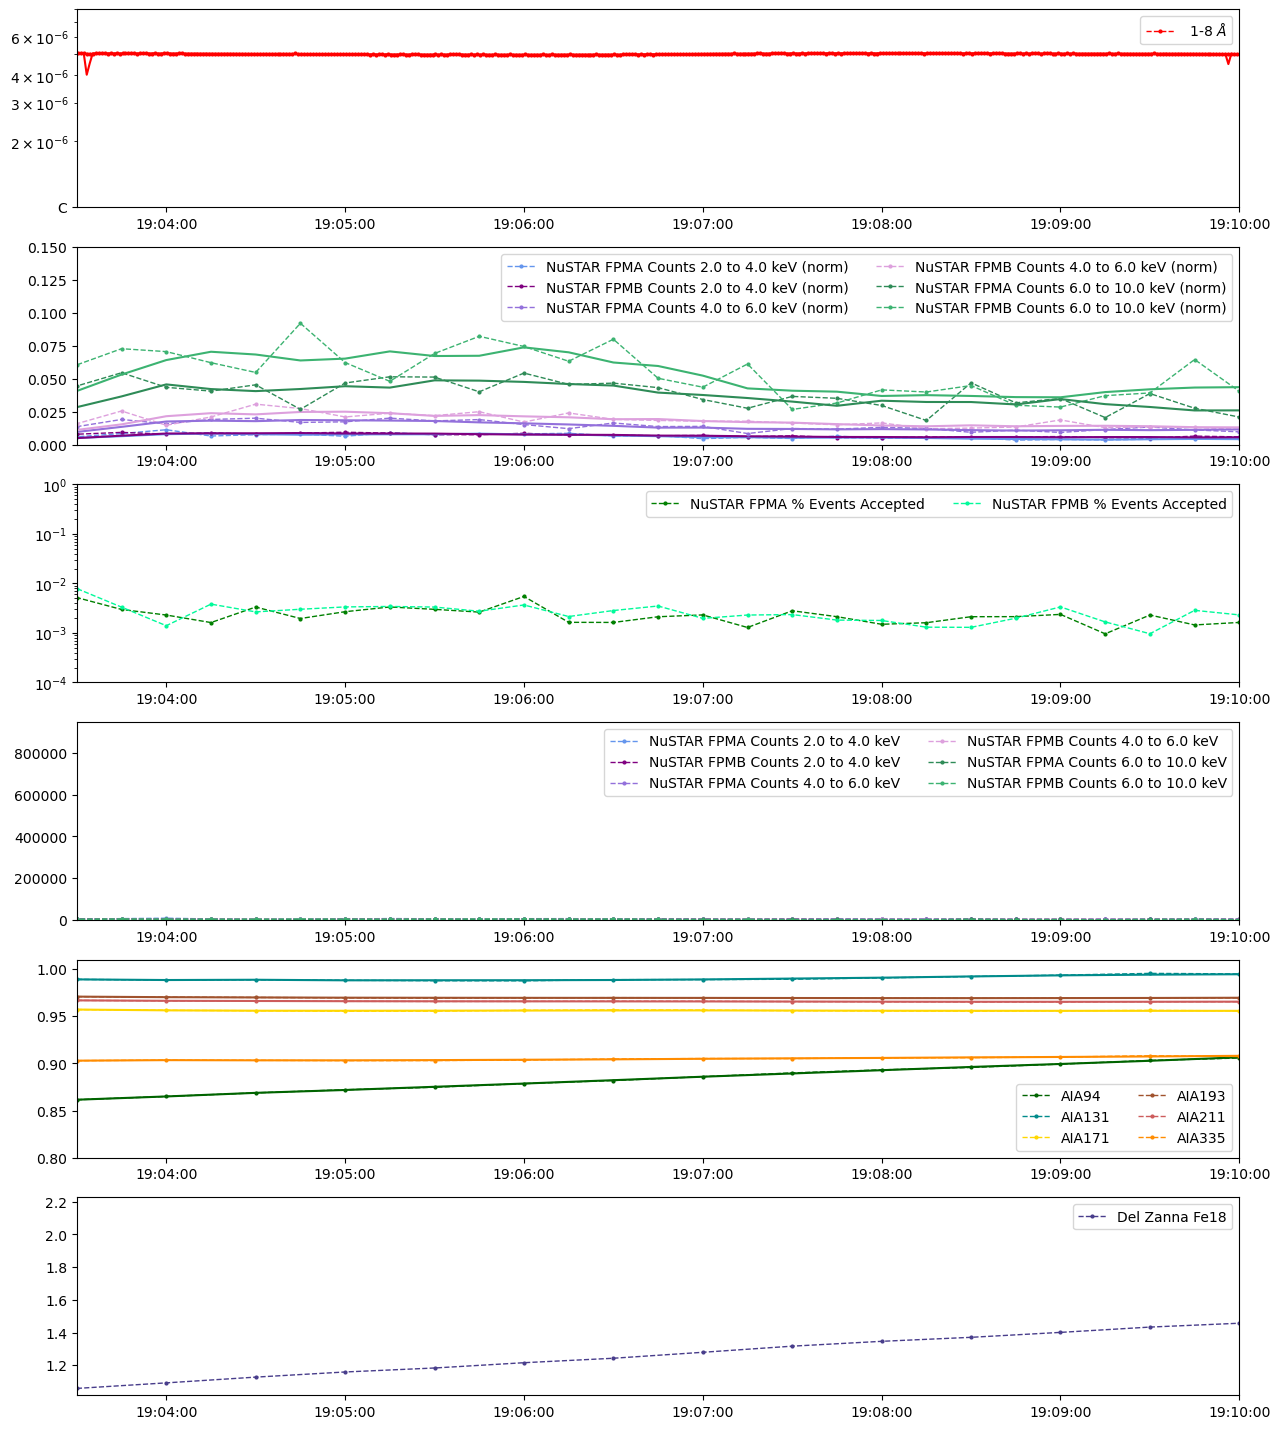

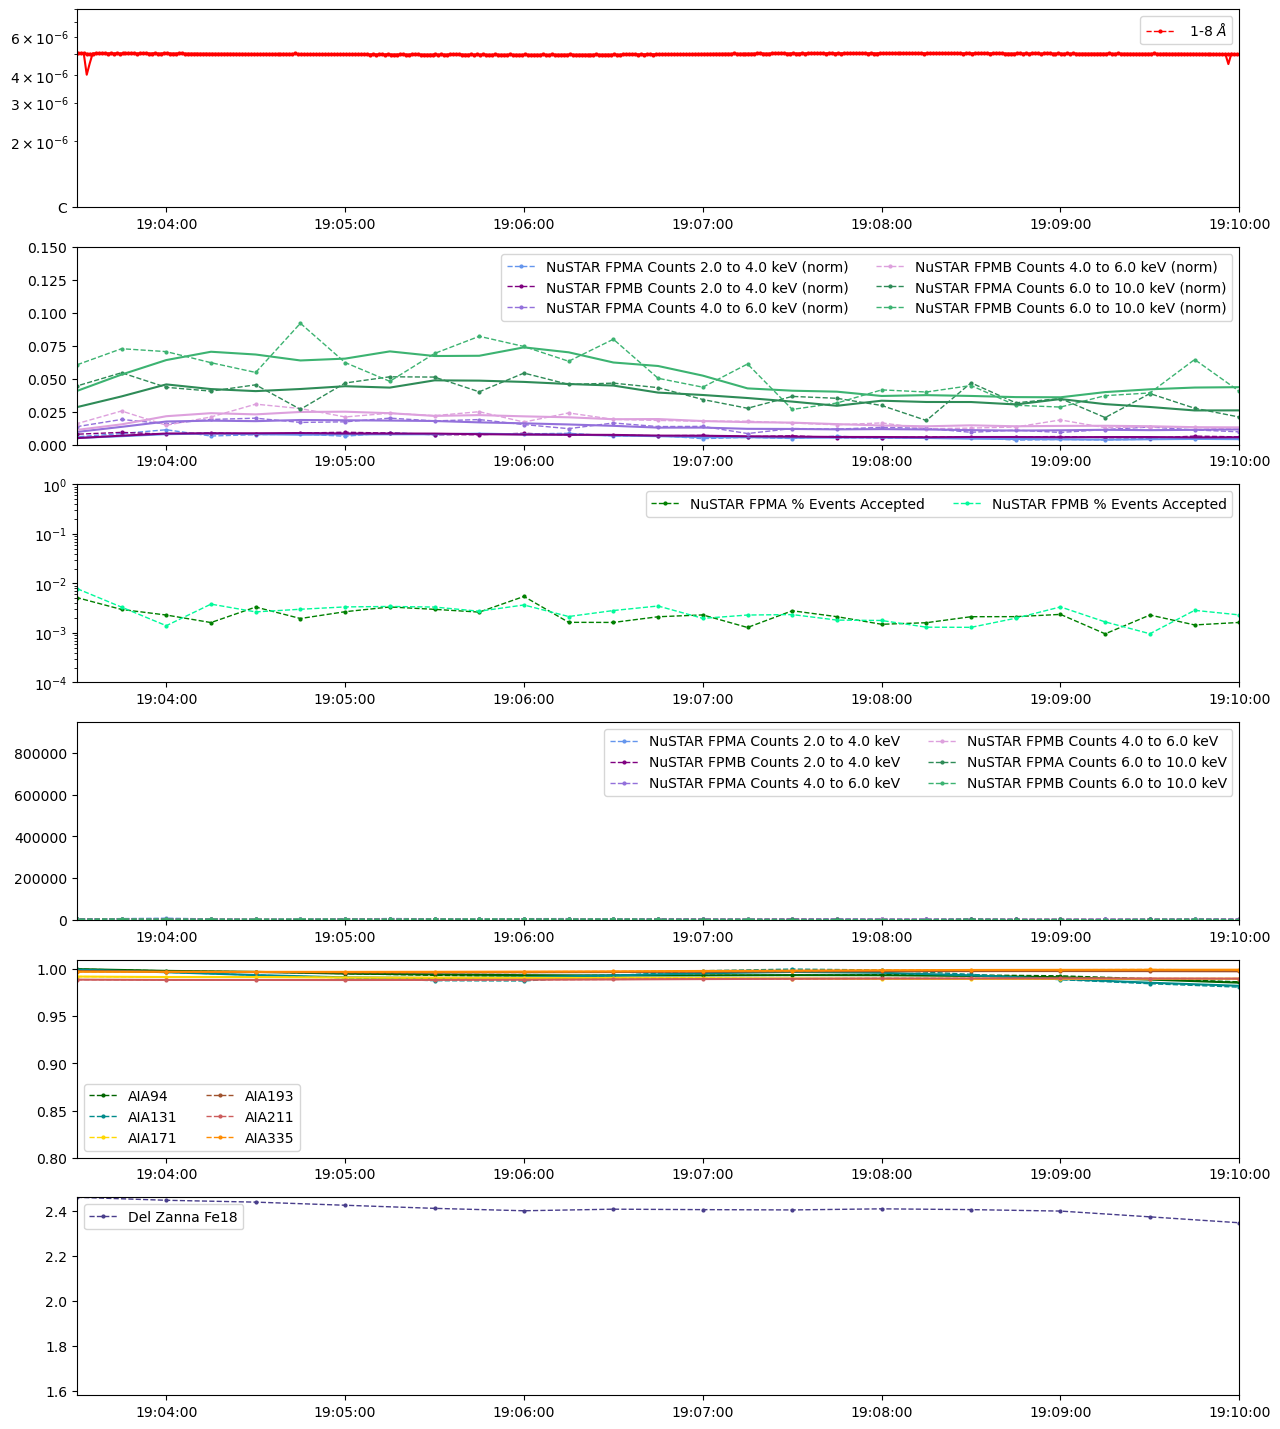

In [13]:
#Magixs orbit – disk AR

working_dir=path_to_dodem+'/jul-24-AR13743/'
int_ind=1
timerange = [datetime.datetime(2024,7,16,19, 3,30), datetime.datetime(2024,7,16,19,10)]
obspath='/Users/jmdunca2/nustar/jul-2024/21012006001/'
nccs_aia_dir='/Users/jmdunca2/do-dem/nccs_aia_21012006001_1/'
lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, 'flight_magixs2_int_disk_AR_', all_fov_nustar=True,
                   rangegB=[1e-6,8e-6], rangeaia=[0.8,1.01], rangenustar_s=[0.0001,1.], rangenustar=[0.,0.15])

#Limb AR
working_dir=path_to_dodem+'/jul-24-AR13738/'
int_ind=1
nccs_aia_dir='/Users/jmdunca2/do-dem/nccs_aia_21012006001_0/'
lightcurves_wrapper(timerange, obspath, working_dir, int_ind, nccs_aia_dir, 'flight_magixs2_int_limb_AR_', all_fov_nustar=True,
                   rangegB=[1e-6,8e-6], rangeaia=[0.8,1.01], rangenustar_s=[0.0001,1.], rangenustar=[0.,0.15], getgoes=False)

In [6]:
# importlib.reload(lc)
# #timerange = [datetime.datetime(2024,7,16,19, 0), datetime.datetime(2024,7,16,20, 10)]
# timerange=[datetime.datetime(2024, 7, 17, 4, 40), datetime.datetime(2024, 7, 17, 5, 40)]
# #timerange=[datetime.datetime(2024, 7, 16, 11, 3), datetime.datetime(2024, 7, 16, 11, 30)]
# #timerange=[datetime.datetime(2024, 7, 16, 19, 3,30), datetime.datetime(2024, 7, 16, 19, 10)]

# #timerange = [datetime.datetime(2024,7,15,19, 0), datetime.datetime(2024,7,15,20, 10)]
# lc.get_goes(timerange, satellite=16)

In [7]:
# import nustar_dem_prep as nu
# in_dir='/Users/jmdunca2/nustar/jul-2024/21012007001/'
# file = glob.glob(in_dir+'/event_cl/nu*06_cl.evt')
# print(file)
# for f in file:
#     nu.convert_wrapper(f)

In [87]:
# obspath='/Users/jmdunca2/nustar/jul-2024/21012007001/'

# evtA = glob.glob(obspath+'/event_cl/*A06_cl_sunpos.evt')
# evtB = glob.glob(obspath+'/event_cl/*B06_cl_sunpos.evt')
# hkA  = glob.glob(obspath+'/hk/*A_fpm.hk')
# hkB  = glob.glob(obspath+'/hk/*B_fpm.hk')

# importlib.reload(lc)
# lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[2.,4.], livetime_corr=True, event_stats=True)
# lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[4.,6.],  livetime_corr=True, event_stats=True)
# lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[6.,10.],  livetime_corr=True, event_stats=True)

In [15]:
i=

SyntaxError: invalid syntax (3713248127.py, line 1)

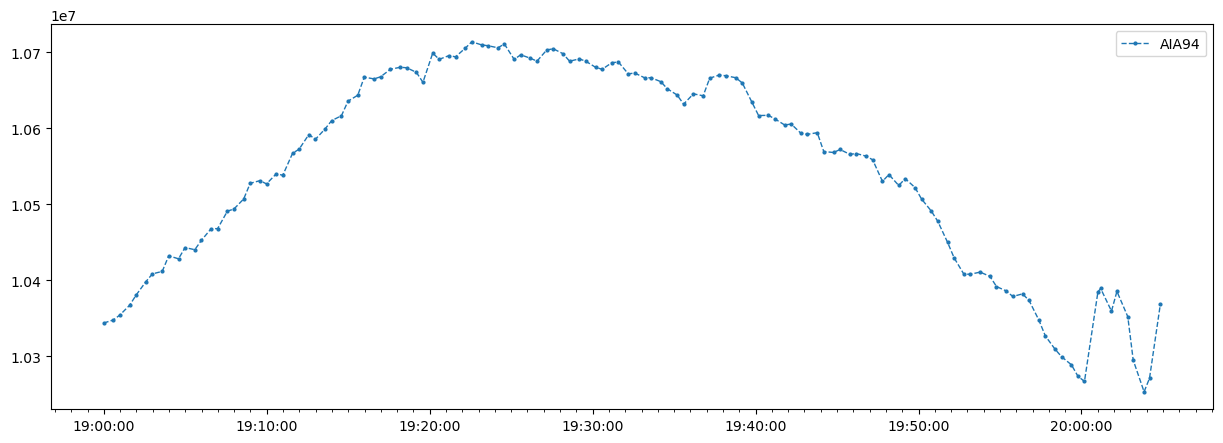

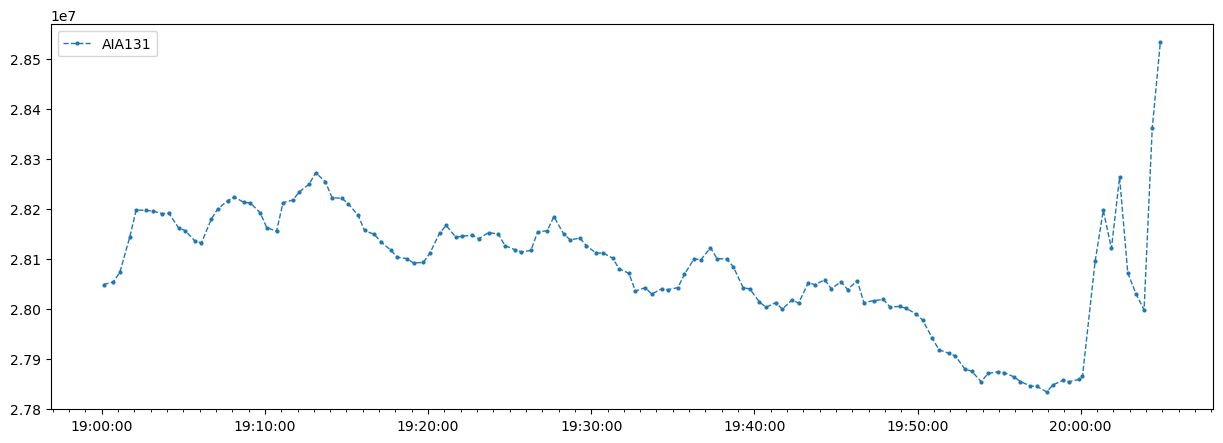

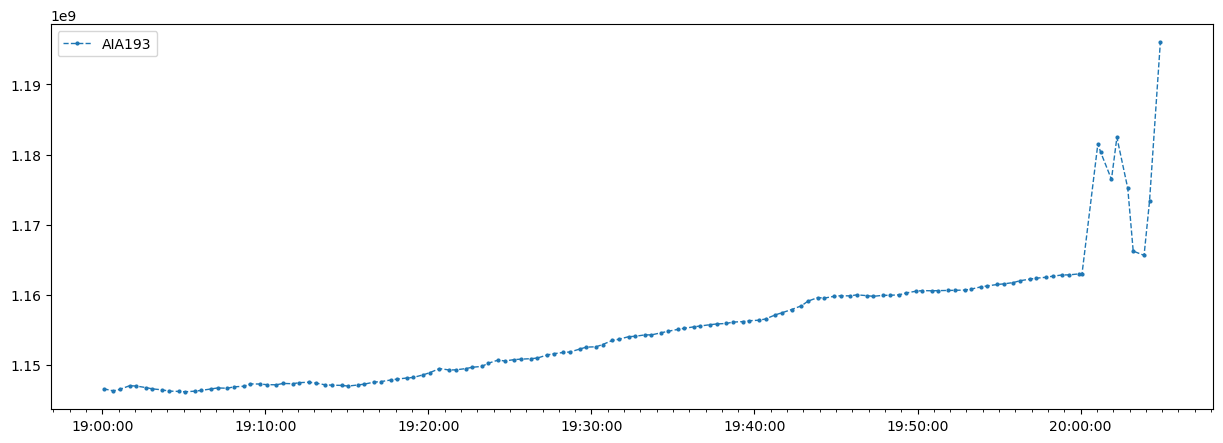

In [102]:
# files = glob.glob(in_dir+'*.fts')
# files.sort()
# files

# import sunpy.map

# sunpy.map.Map(files[-3])


importlib.reload(lc) 
#channels = [94, 131, 171, 193, 211, 335]
channels = [94, 131, 193]
in_dir = '/Users/jmdunca2/magixs2aia/'
time_range = ('2024-07-16 18:57:00', '2024-07-16 20:05:00')
fulldisk=False
instrument = 'AIA'
plot=True

regiondict = {'radius': 200*u.arcsec,
              'center': [450*u.arcsec, -400*u.arcsec]}


lc.prepare_lightcurves(in_dir, channels, time_range, instrument, fulldisk=fulldisk, plot=plot)#, aiaregion=regiondict)

The above weird spiky discontinuities seem to be due to varying exposure times in AIA data (these three filters have ~6s exposure times towards the end of the orbit, as opposed to normal values in the vicinity of 2s. Obviously, correcting for exposure time is necessary for lightcurves – but this does not fully resolve the discontinuity (see above, where map/map.exposure_time has been used, as described here: https://aiapy.readthedocs.io/en/stable/preparing_data.html, to no avail). 

Hopefully this will not be an issue when we get the full-disk data on the NCCS? (As that data can be run through the aia_prep equivalent process, which I'm hoping resolves this...) If not, will re-open this investigation then.

In [23]:
files = glob.glob('/Users/jmdunca2/JSOC_20241023_001628/'+'*.fits')

In [27]:
len(files)

2430

Observatory,SDO
Instrument,AIA 2
Detector,AIA
Measurement,193.0 Angstrom
Wavelength,193.0 Angstrom
Observation Date,2024-07-16 18:59:04
Exposure Time,1.9996219999999998 s
Dimension,[2000. 1667.] pix
Coordinate System,helioprojective
Scale,[0.60071403 0.60071403] arcsec / pix
Reference Pixel,[1505.23047 -167.722672] pix

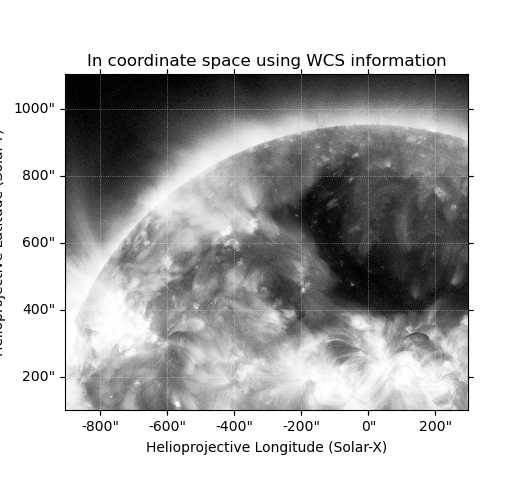
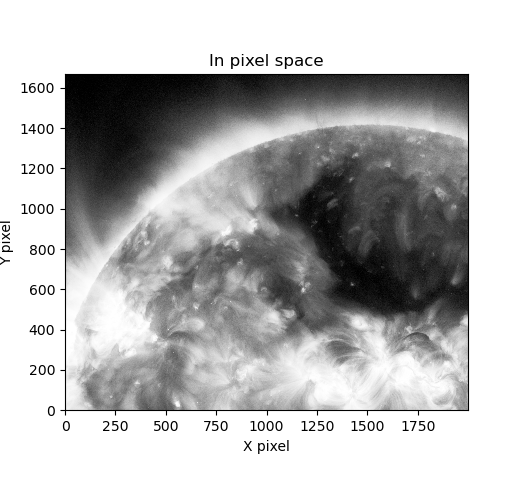
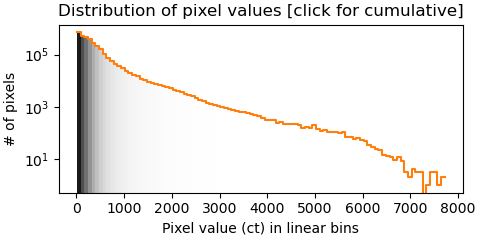
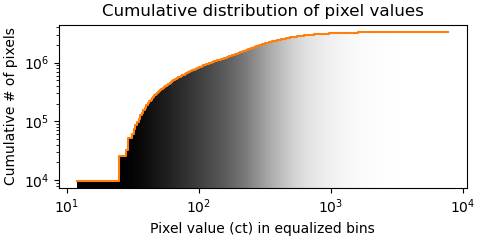

In [29]:
import sunpy.map

sunpy.map.Map(files[2000])